# Forecasting Model to Predict Product Demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

productDF = pd.read_csv("../data/Historical Product Demand.csv")

In [2]:
productDF.sort_values(['Date'], inplace=True)
productDF

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
131429,Product_0412,Whse_S,Category_007,2011/10/20,(2)
131426,Product_0125,Whse_S,Category_011,2011/10/20,(2)
75193,Product_0642,Whse_C,Category_019,2011/10/31,3
131026,Product_2137,Whse_S,Category_009,2011/11/18,(25)
131032,Product_0288,Whse_S,Category_021,2011/11/18,(50)
131031,Product_0131,Whse_S,Category_021,2011/11/18,(12)
131027,Product_2138,Whse_S,Category_009,2011/11/18,(49)
131028,Product_2143,Whse_S,Category_009,2011/11/18,(25)
44450,Product_0980,Whse_A,Category_028,2011/11/18,4000


## Data Cleaning and Feature Engineering

### 1. Dropping NaN Values
First lets check how many NaN values there are in the dataset. If it is not a significant amount we can just drop all the NaN values.

In [3]:
numNaN = productDF.isna().sum()
numNaN

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

Looks like there is 11239 NaN values compared to 1048575 rows. Since it is not a significant amount (~1%) of the data set, I will drop all of it.

In [4]:
productDF.dropna(inplace=True)

### 2. Keeping Order_Demand type consistent

As we saw above, under the Order_Demand column, there are some values that have ( ) around them and some that do not. Therefore, to keep it consistent, I will use extraction to remove the ( ) for all the values that have them and change them all to int types.

In [5]:
productDF['Order_Demand'] = productDF['Order_Demand'].str.replace('(',"")
productDF['Order_Demand'] = productDF['Order_Demand'].str.replace(')',"")
productDF['Order_Demand'] = productDF['Order_Demand'].astype('int64')

### 3. Splitting Date Column into Day, Month, Year

Currently the data set has the Date column as an object type. To add more features and to easily keep track of trends between Day, Month, and Year, I will be adding those 3 features to the dataset.

In [6]:
productDF['Date'] = productDF['Date'].astype('datetime64[ns]')
productDF['Day'] = pd.DatetimeIndex(productDF['Date']).day
productDF['Month'] = pd.DatetimeIndex(productDF['Date']).month
productDF['Year'] = pd.DatetimeIndex(productDF['Date']).year

### 4. Visualization

To further establish addition value from our data set, lets create some visualizations!

#### a) Comparing Demands between Warehouses

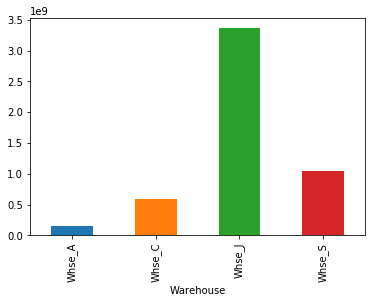

In [7]:
warehouseDemand = productDF.groupby('Warehouse')['Order_Demand'].sum()
warehouseDemand.plot.bar()

As we can see from the bar graph, warehouse J has significantly more orders compared to the others.

#### b) Comparing Demands between Product Category

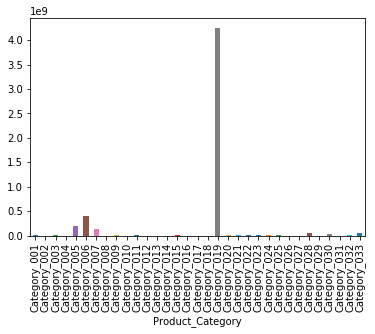

In [8]:
categoryDemand = productDF.groupby('Product_Category')['Order_Demand'].sum()
categoryDemand.plot.bar()

Another interesting bar graph. As we can see, the orders coming from Category 19 is significantly more than any other categories. This makes me curious about the order trends for Category 19.

#### 4. Time Series of Demands for Category 19

Due to the high volume of orders coming from category 19. I have decided to focus my analysis on the time series of demands only for Category 19.

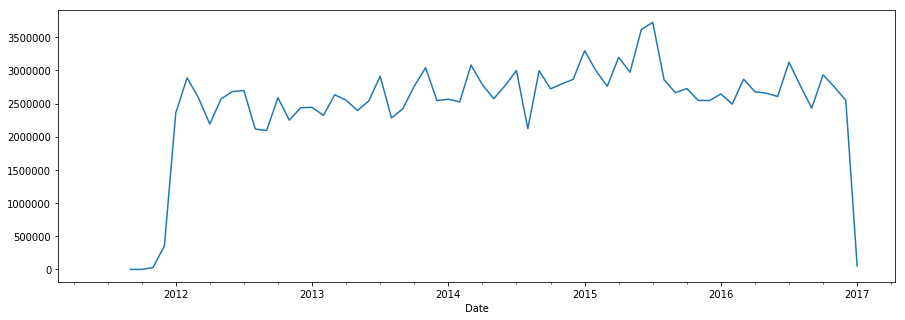

In [9]:
cat19DF = productDF.where(productDF['Product_Category']=='Category_019')
cat19DemandDates = cat19DF.groupby('Date').sum()
cat19DemandDates = cat19DemandDates['Order_Demand'].resample('MS').mean()
cat19DemandDates.plot(figsize=(15,5))

## Building the Forecasting Model

As mention aboved. Due to the significant amount of products ordered from Category 19, I would like to focus on the data from Category 19 and build the model based on that. Another reason why I chose to focus only on one product category is because I believe its the order trends between the other categories might vary too much. For example, the order trend between people ordering Car Parts vs. Clothing would be vastly different. Therefore, by only focusing on a single category, I believe we will be able to better predict the product demand for that category.

We will be testing 2 different forecasting models and comparing their accuracies. The first model we will be testing is the good old Linear Regression Model as it is easy to implement. The second model we will be testing is the Gradient Boost model as it is highly accurate.

### Data pre-processing

In [10]:
cat19DF.dropna(inplace=True)
x = cat19DF[['Day','Month','Year']]
y = cat19DF['Order_Demand']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

### Training the Linear Regression Model

In [11]:
modelLR = linear_model.LinearRegression()
modelLR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Linear Regression Prediction and Evaluation

In [12]:
y_predict = modelLR.predict(x_test)
r2_score(y_test,y_predict)

0.00011293226764041986

### Training the Gradient Boost Model

In [13]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'learning_rate': 0.02,
          'loss': 'ls'}
modelGB = ensemble.GradientBoostingRegressor(**params)
modelGB.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Gradient Boost Prediciton and Evaluation

In [14]:
y_predict = modelGB.predict(x_test)
r2_score(y_test,y_predict)

0.002066569442236821

## Conclusion

As we can see, the scores for either Models is not very great. Some things we can note is that the Gradient Boost Model has better accuracy in comparison to the Linear Regression Model scoring ~20x better.  It does however take a longer time to run. 

### Thoughts on the low evaluation scores
After trying over 10 combinations of Gradient Boost parameters, I have found the one implemented above to have a decent result with a reasonable run time amongst the one I tested. Maybe with a faster machine, we could quickly test a Gradient Boost Model with many more boosting stages (n_estimators) or a larger maximum depth that would result in a higher accuracy.